# World Data League 2021
## Notebook Template

This notebook is one of the mandatory deliverables when you submit your solution (alongside the video pitch). Its structure follows the WDL evaluation criteria and it has dedicated cells where you can add descriptions. Make sure your code is readable as it will be the only technical support the jury will have to evaluate your work.

The notebook must:

*   💻 have all the code that you want the jury to evaluate
*   🧱 follow the predefined structure
*   📄 have markdown descriptions where you find necessary
*   👀 be saved with all the output that you want the jury to see
*   🏃‍♂️ be runnable


##Challenge: Attracting Population to Green Spaces in Metropolitan Areas
##Team: NextEpoch

## Authors
Write the name (first and last) of the people on your team that are responsible for developing this solution.

## External links and resources
Paste here all the links to external resources that are necessary to understand and run your code. Add descriptions to make it clear how to use them during evaluation.

## Introduction
Describe how you framed the challenge by telling us what problem are you trying to solve and how your solution solves that problem.

###**Challenge Goals :**
Attracting people to green spaces in metropolitan areas is one of the most recent
challenges for big cities. Encouraging people to spend more time in green spaces is one of
the priority goals of municipal governments.
It is fundamental to understand how various dimensions are linked to the search for green
space in large Metropolitan Areas, such as in the metropolitan area of Porto and Lisbon.
How can socio-demographic dimensions, tourist attraction, and people’s mobility level
non-resident in the influence area of the green spaces explain the demand for these
spaces?

###**Outcome**
The challenge is composed of two outcomes:
1. Create a model that predicts the daily average demand of a green space and which
factors contribute the most to the prediction—example of these factors:
socio-demographic, touristic attraction points, mobility and others.
2. Based on the previous outcome, suggest action points that can be taken by the city
hall to increase the usage of the green spaces in the city.



###**About the data**
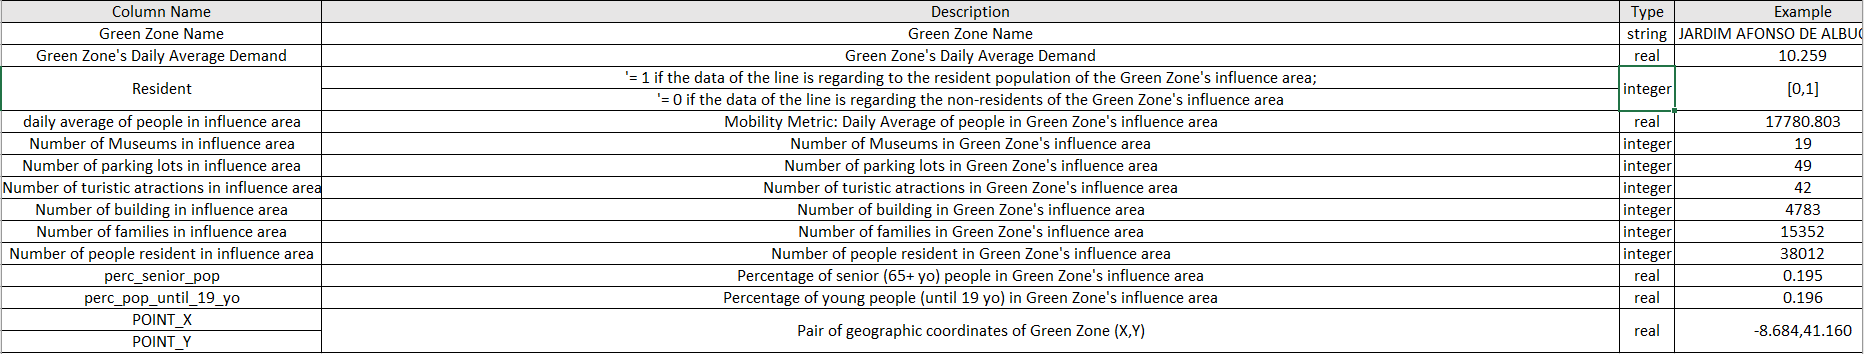

####**Green Spaces Visitation**
This dataset provides the number of visitors (in absolute numbers) to green spaces, inside
and outside of their influence area in the Metropolitan Area of Lisbon and Porto.
The influence area of a green space corresponds to the average of the maximum distances
from the point of origin of its daily users.

## Development
Start coding here! 👩‍💻

Don't hesitate to create markdown cells to include descriptions of your work where you see fit, as well as commenting your code.

We know that you know exactly where to start when it comes to crunching data and building models, but don't forget that WDL is all about social impact...so take that into consideration as well.

### Importing Modules and data

In [ ]:
# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 
# Install Folium for Geographic data visualization
!pip install folium
# Install plotlyExpress
!pip install plotly_express

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  python3-numpy
Suggested packages:
  python-numpy-doc python3-nose python3-numpy-dbg
The following NEW packages will be installed:
  python3-gdal python3-numpy
0 upgraded, 2 newly installed, 0 to remove and 34 not upgraded.
Need to get 2,288 kB of archives.
After this operation, 13.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-numpy amd64 1:1.13.3-2ubuntu1 [1,943 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python3-gdal amd64 2.2.3+dfsg-2 [346 kB]
Fetched 2,288 kB in 2s (1,089 kB/s)
Selecting previously unselected

In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd # To work with geopandas data
from shapely.geometry import Point # For Data visualization
import matplotlib
import matplotlib.pyplot as plt  # For data visualization
import folium                    # For data visualization
import plotly_express as px
from sklearn.cluster import KMeans # For clustering
from matplotlib.pyplot import figure  # For data visualization
from string import ascii_letters      
import seaborn as sns    # For generating correlation Matrix

In [ ]:
green_areas = pd.read_csv('https://raw.githubusercontent.com/SowmyaMadala/WDL-Stage4/main/Data/Attracting%20Population/WDL_Green_Areas_Dataset_V1.txt' ,sep ="|", encoding ="latin-1").rename(columns = {'Number of Museums in influence area' : 'no_of_museums',
                                                                                                                                  'Number of parking lots in influence area' : 'no_of_parking_lots',
                                                                                                                                   'Number of tourist attractions in influence area': 'no_of_tourist_attractions', 
                                                                                                                                   'Green Zones Daily Average Demand':'gz_daily_avg_demand',
                                                                                                                                    'Daily average of people in influence area': 'daily_avg_people',
                                                                                                                                    'Number of buildings in influence area' : 'no_of_buildings',
       'Number of families in influence area': 'no_of_families',
       'Number of people resident in influence area' : 'no_of_people_resident'
                                                                                                                                    })
green_areas.head(3)

,Green_Zone_name,no_of_museums,no_of_parking_lots,no_of_tourist_attractions,gz_daily_avg_demand,Resident,daily_avg_people,no_of_buildings,no_of_families,no_of_people_resident,perc_senior_pop,perc_pop_until_19_yo,POINT_X,POINT_Y
0,ESPAÇO JOGO E RECREIO HOMEM DO LEME,5,28,30,3.728677,1,17780.803014,4783,15352,38012,0.195123,0.196017,-8.68415,41.16001
1,ESPAÇO JOGO E RECREIO HOMEM DO LEME,5,28,30,3.728677,0,45787.629298,4783,15352,38012,0.195123,0.196017,-8.68415,41.16001
2,JARDIM AFONSO DE ALBUQUERQUE,93,129,78,10.259113,0,42877.741202,1775,17185,41163,0.161747,0.204917,-9.19949,38.69674


Converting the Latitute and longitude data into points geometry

In [ ]:
from shapely.geometry import Point

green_area_data_points = green_areas.apply(lambda srs: Point(float(srs['POINT_Y']), float(srs['POINT_X'])),
    axis='columns')
green_area_geo_data =gpd.GeoDataFrame(green_areas.drop(columns=['POINT_X','POINT_Y']), geometry= combined_data_points)
green_area_geo_data.head(3)

,Green_Zone_name,no_of_museums,no_of_parking_lots,no_of_tourist_attractions,gz_daily_avg_demand,Resident,daily_avg_people,no_of_buildings,no_of_families,no_of_people_resident,perc_senior_pop,perc_pop_until_19_yo,geometry
0,ESPAÇO JOGO E RECREIO HOMEM DO LEME,5,28,30,3.728677,1,17780.803014,4783,15352,38012,0.195123,0.196017,POINT (41.16001 -8.68415)
1,ESPAÇO JOGO E RECREIO HOMEM DO LEME,5,28,30,3.728677,0,45787.629298,4783,15352,38012,0.195123,0.196017,POINT (38.69674 -9.19949)
2,JARDIM AFONSO DE ALBUQUERQUE,93,129,78,10.259113,0,42877.741202,1775,17185,41163,0.161747,0.204917,POINT (38.75294 -9.15757)


###**EDA**

In [ ]:
green_area_geo_data.shape, green_area_geo_data.dtypes

((128, 13), Green_Zone_name                object
 no_of_museums                   int64
 no_of_parking_lots              int64
 no_of_tourist_attractions       int64
 gz_daily_avg_demand           float64
 Resident                        int64
 daily_avg_people              float64
 no_of_buildings                 int64
 no_of_families                  int64
 no_of_people_resident           int64
 perc_senior_pop               float64
 perc_pop_until_19_yo          float64
 geometry                     geometry
 dtype: object)

In [ ]:
green_area_geo_data.describe()

,no_of_museums,no_of_parking_lots,no_of_tourist_attractions,gz_daily_avg_demand,Resident,daily_avg_people,no_of_buildings,no_of_families,no_of_people_resident,perc_senior_pop,perc_pop_until_19_yo
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,42.093750,58.640625,34.562500,193.392121,0.500000,26719.177597,3626.343750,15653.734375,37741.187500,0.193813,0.192354
std,43.297804,64.509138,40.355848,465.213133,0.501965,19261.974531,2183.034349,7094.396956,17294.631008,0.056171,0.031869
min,0.000000,0.000000,0.000000,1.495627,0.000000,250.571925,1553.000000,1893.000000,4663.000000,0.099891,0.149062
25%,2.000000,5.750000,1.750000,10.051912,0.000000,13482.034604,1775.000000,10994.000000,24265.000000,0.161672,0.163131
50%,20.000000,30.500000,14.000000,38.086393,0.500000,22274.016565,2811.000000,16735.000000,38057.000000,0.161747,0.197283
75%,91.250000,96.250000,62.250000,160.317847,1.000000,36893.356166,4844.250000,19277.250000,45380.750000,0.242176,0.204917
max,111.000000,234.000000,203.000000,3193.372906,1.000000,94809.514222,9811.000000,36985.000000,90176.000000,0.295239,0.260294


In [ ]:
print(len(set(green_area_geo_data['Green_Zone_name'])))
green_area_geo_data['Green_Zone_name'].value_counts()

64


JARDIM DO PRÍNCIPE REAL                2
JARDIM DA BOAVISTA                     2
QUINTA DAS CONCHAS                     2
JRD. CP. VINTE E QUATRO DE AGOSTO      2
JARDIM FUNDAÇÃO CALOUSTE GULBENKIAN    2
                                      ..
JARDIM AMÉLIA CARVALHEIRA              2
JARDIM DE SANTOS                       2
JARDIM LISBOA ANTIGA                   2
PARQUE DA CIDADE DE LOURES             2
ESPAÇO JOGO E RECREIO HOMEM DO LEME    2
Name: Green_Zone_name, Length: 64, dtype: int64

In [ ]:
green_area_geo_data.head(2)

,Green_Zone_name,no_of_museums,no_of_parking_lots,no_of_tourist_attractions,gz_daily_avg_demand,Resident,daily_avg_people,no_of_buildings,no_of_families,no_of_people_resident,perc_senior_pop,perc_pop_until_19_yo,geometry
0,ESPAÇO JOGO E RECREIO HOMEM DO LEME,5,28,30,3.728677,1,17780.803014,4783,15352,38012,0.195123,0.196017,POINT (41.16001 -8.68415)
1,ESPAÇO JOGO E RECREIO HOMEM DO LEME,5,28,30,3.728677,0,45787.629298,4783,15352,38012,0.195123,0.196017,POINT (38.69674 -9.19949)


For each Greenzone we have 2 rows of data one regarding the residents(Residents=1)  and other with non residents (Residents=0) 

In [ ]:
#Let's check if the average people visting green spaces are mostly residents or the non-residents
green_area_geo_data.groupby('Resident')['daily_avg_people'].describe()

,count,mean,std,min,25%,50%,75%,max
Resident,,,,,,,,
0,64.0,34535.099849,22983.037377,250.571925,8821.912635,36893.356166,45787.629298,94809.514222
1,64.0,18903.255346,9777.524219,552.667924,14666.685976,17497.825376,22274.016565,49448.596049


It is observed that most of the people visting green spaces are non-residents

Instead of having two seperate rows for that we can create two columns daily_avg_people_resident  and daily_avg_people_non_resident

In [ ]:
resident  = green_area_geo_data.loc[green_area_geo_data['Resident']==1]
resident = resident.rename(columns= {'daily_avg_people': 'daily_avg_people_resident'})
non_resident  = green_area_geo_data.loc[green_area_geo_data['Resident']==0]
non_resident = non_resident.rename(columns= {'daily_avg_people': 'daily_avg_people_non_resident'})
combined_data = pd.merge(resident, non_resident[['Green_Zone_name', 'daily_avg_people_non_resident']], how = "inner", on = ['Green_Zone_name']).drop(columns=['Resident'])
combined_data.head(3)

,Green_Zone_name,no_of_museums,no_of_parking_lots,no_of_tourist_attractions,gz_daily_avg_demand,daily_avg_people_resident,no_of_buildings,no_of_families,no_of_people_resident,perc_senior_pop,perc_pop_until_19_yo,geometry,daily_avg_people_non_resident
0,ESPAÇO JOGO E RECREIO HOMEM DO LEME,5,28,30,3.728677,17780.803014,4783,15352,38012,0.195123,0.196017,POINT (41.16001 -8.68415),45787.629298
1,JARDIM AFONSO DE ALBUQUERQUE,93,129,78,10.259113,17497.825376,1775,17185,41163,0.161747,0.204917,POINT (38.73757 -9.13207),42877.741202
2,JARDIM ALAMEDA CIDADE UNIVERSITÁRIA,8,23,4,47.347816,17497.825376,1775,17185,41163,0.161747,0.204917,POINT (38.73919 -9.15018),42877.741202


In [ ]:
combined_data.shape

(64, 13)

In [ ]:
combined_data.describe()

,no_of_museums,no_of_parking_lots,no_of_tourist_attractions,gz_daily_avg_demand,daily_avg_people_resident,no_of_buildings,no_of_families,no_of_people_resident,perc_senior_pop,perc_pop_until_19_yo,daily_avg_people_non_resident
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,42.093750,58.640625,34.562500,193.392121,18903.255346,3626.343750,15653.734375,37741.187500,0.193813,0.192354,34535.099849
std,43.469281,64.764621,40.515674,467.055568,9777.524219,2191.680063,7122.493687,17363.124864,0.056394,0.031995,22983.037377
min,0.000000,0.000000,0.000000,1.495627,552.667924,1553.000000,1893.000000,4663.000000,0.099891,0.149062,250.571925
25%,2.000000,5.750000,1.750000,10.051912,14666.685976,1775.000000,10994.000000,24265.000000,0.161672,0.163131,8821.912635
50%,20.000000,30.500000,14.000000,38.086393,17497.825376,2811.000000,16735.000000,38057.000000,0.161747,0.197283,36893.356166
75%,91.250000,96.250000,62.250000,160.317847,22274.016565,4844.250000,19277.250000,45380.750000,0.242176,0.204917,45787.629298
max,111.000000,234.000000,203.000000,3193.372906,49448.596049,9811.000000,36985.000000,90176.000000,0.295239,0.260294,94809.514222


###Exploring Non Resident data

In [ ]:
corr_non_resident = non_resident.corr()
corr_non_resident['daily_avg_people_non_resident'].sort_values()

perc_pop_until_19_yo            -0.630632
no_of_parking_lots              -0.442793
no_of_museums                   -0.407714
no_of_tourist_attractions       -0.296198
gz_daily_avg_demand              0.029229
no_of_people_resident            0.390332
no_of_buildings                  0.413700
no_of_families                   0.474669
perc_senior_pop                  0.481358
daily_avg_people_non_resident    1.000000
Resident                              NaN
Name: daily_avg_people_non_resident, dtype: float64

The attributes with most influence on ***Daily_average_non_resident_population*** are *Percentage_senior_population, perc_pop_until_19_yo, no_of_families*

where as the attributes that are least influential are *no_of_tourist_attractions, no_of_people_resident*

## Conclusions

### Scalability and Impact
Tell us how applicable and scalable your solution is if you were to implement it in a city. Identify possible limitations and measure the potential social impact of your solution.

### Future Work
Now picture the following scenario: imagine you could have access to any type of data that could help you solve this challenge even better. What would that data be and how would it improve your solution? 🚀